In [24]:
!nvidia-smi

Mon Oct  6 06:31:18 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   65C    P0             28W /   70W |     362MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [25]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [26]:
#download
!kaggle datasets download -d samuelcortinhas/apples-or-tomatoes-image-classification

Dataset URL: https://www.kaggle.com/datasets/samuelcortinhas/apples-or-tomatoes-image-classification
License(s): CC0-1.0
apples-or-tomatoes-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [27]:
!unzip /content/apples-or-tomatoes-image-classification.zip

Archive:  /content/apples-or-tomatoes-image-classification.zip
replace test/apples/img_p1_111.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test/apples/img_p1_111.jpeg  
replace test/apples/img_p1_121.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test/apples/img_p1_121.jpeg  
replace test/apples/img_p1_127.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test/apples/img_p1_127.jpeg  
replace test/apples/img_p1_131.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test/apples/img_p1_131.jpeg  
replace test/apples/img_p1_133.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [41]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [42]:
train_path = '/content/train'
valid_path = '/content/test'

In [43]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, MaxPooling2D

In [44]:
#check categories in folder
folders = glob('/content/train/*')
folders

['/content/train/tomatoes', '/content/train/apples']

In [45]:
#len of classes
num_of_class = len(folders)
num_of_class

2

In [54]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [55]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,177,281 (42.64 MB)

 Trainable params: 11,177,281 (42.64 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [57]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [58]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [59]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 294 images belonging to 2 classes.


In [60]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 97 images belonging to 2 classes.


In [61]:
history = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 847ms/step - accuracy: 0.4436 - loss: 0.9228 - val_accuracy: 0.6186 - val_loss: 0.6728
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 319ms/step - accuracy: 0.6251 - loss: 0.6598 - val_accuracy: 0.6598 - val_loss: 0.6547
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 322ms/step - accuracy: 0.6234 - loss: 0.6375 - val_accuracy: 0.6701 - val_loss: 0.6534
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 347ms/step - accuracy: 0.6721 - loss: 0.6319 - val_accuracy: 0.6907 - val_loss: 0.5871
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 422ms/step - accuracy: 0.6845 - loss: 0.5913 - val_accuracy: 0.7216 - val_loss: 0.5467
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 330ms/step - accuracy: 0.7295 - loss: 0.5315 - val_accuracy: 0.7113 - val_loss: 0.4547
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 333ms/step - accuracy: 0.7570 - loss: 0.5390 - val_accuracy: 0.6804 - val_loss: 0.5965
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 495ms/step - accuracy: 0.7351 - loss: 0.5715 - val_accuracy: 0

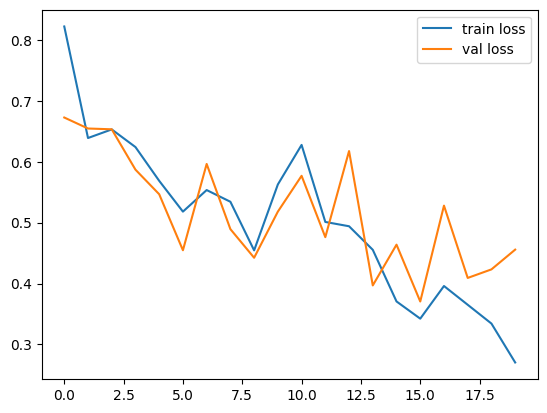

<Figure size 640x480 with 0 Axes>

In [62]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

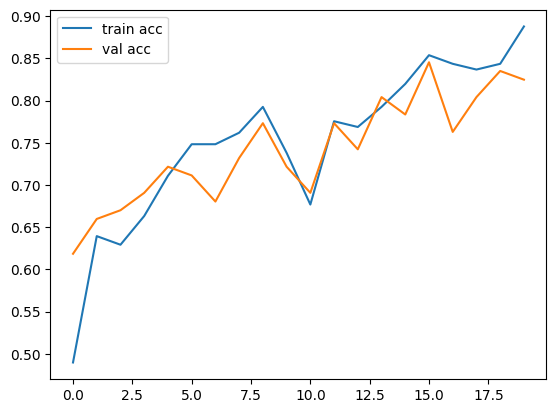

<Figure size 640x480 with 0 Axes>

In [63]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [64]:
model.evaluate(test_set)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8309 - loss: 0.4562


[0.4556724429130554, 0.8247422575950623]

In [82]:
model.save('model.h5')

In [83]:
#load model
from tensorflow.keras.models import load_model
model = load_model("model.h5")

In [84]:
from tensorflow.keras.preprocessing import image

In [101]:
img=image.load_img('/content/train/apples/img_p1_42.jpeg',target_size=(224,224))

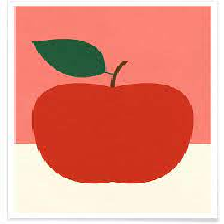

In [102]:
img

In [103]:
x=image.img_to_array(img)
x=x/255

x=np.expand_dims(x,axis=0)
output = model.predict(x)
print(output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.1414448]]


In [104]:
x.shape

(1, 224, 224, 3)

In [105]:
output[0][0]

np.float32(0.1414448)

In [106]:
if output[0][0] >=0.5:
    prediction = 'Tomato'
    print(prediction)
else:
    prediction = 'Apple'
    print(prediction)

Apple
